In [1]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [45]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [3]:
#Generates our dataset
dataset=make_blobs(n_samples=200,
                  centers=4,
                  n_features=2,
                  cluster_std=1.6,
                  random_state=50)

In [4]:
dataset

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

In [5]:
#dataset=pd.read_csv("urbanGB.csv")
from numpy import genfromtxt
dataset = genfromtxt('urbanGB.csv', delimiter=',', skip_header = 1)

In [6]:
dataset

array([[-3.11255 , 55.8706  ],
       [-0.088533, 51.3806  ],
       [-0.326795, 51.4476  ],
       ...,
       [-0.128844, 51.5126  ],
       [-1.88564 , 52.449   ],
       [-4.05597 , 55.8215  ]])

In [7]:
#we have our dataset
k_dataset=dataset

In [8]:
from sklearn.cluster import KMeans

In [9]:
#creating a k-means object
k_Means_Obj=KMeans(n_clusters=4)

In [25]:
import time
start = time.time()
k_Means_Obj.fit(k_dataset)
end = time.time()

In [11]:
clusters=k_Means_Obj.cluster_centers_

In [12]:
clusters

array([[-1.89431462, 53.36831262],
       [-0.14612736, 51.53345477],
       [-3.75198245, 55.94347303],
       [-3.00815439, 51.23120857]])

In [13]:
final_km=k_Means_Obj.fit_predict(k_dataset)

In [14]:
#assigned cluster number
final_km

array([1, 0, 0, ..., 0, 3, 1])

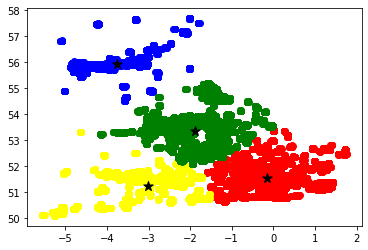

In [15]:
plt.scatter(k_dataset[final_km==0,0],k_dataset[final_km==0,1],color='red')
plt.scatter(k_dataset[final_km==1,0],k_dataset[final_km==1,1],color='blue')
plt.scatter(k_dataset[final_km==2,0],k_dataset[final_km==2,1],color='yellow')
plt.scatter(k_dataset[final_km==3,0],k_dataset[final_km==3,1],color='green')
plt.scatter(clusters[0][0],clusters[0][1],marker='*',s=100,color='black')
plt.scatter(clusters[1][0],clusters[1][1],marker='*',s=100,color='black')
plt.scatter(clusters[2][0],clusters[2][1],marker='*',s=100,color='black')
plt.scatter(clusters[3][0],clusters[3][1],marker='*',s=100,color='black')

In [23]:
k_Means_Obj.inertia_

252193.0469186305

In [26]:
print(end-start)

3.3856139183044434


In [17]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(k_dataset)
    sse.append(km.inertia_)

In [21]:
sse

[1314198.1760473945,
 638138.5381567155,
 412968.14667227224,
 252193.04691863048,
 201627.93022684602,
 160878.95291326457,
 134591.99765956256,
 115643.12778911635,
 99522.45172241468]

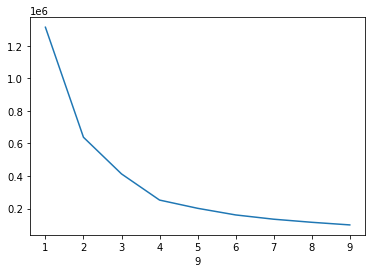

In [20]:
plt.xlabel(k)
plt.plot(k_rng,sse)